# Example Datasets

cartoframes' example datasets functionality allows users to learn cartoframes features 1) without needing to authenticate against their account, or 2) using pre-packaged data to follow along in notebooks

In [1]:
from cartoframes.examples import example_context
from cartoframes import Layer, QueryLayer

## List available tables

In [2]:
[table.name for table in example_context.tables()]

['mcdonalds_nyc', 'nyc_census_tracts', 'brooklyn_poverty', 'taxi_50k', 'nat']

## Brooklyn Poverty Data

In [3]:
from cartoframes.examples import read_brooklyn_poverty
df = read_brooklyn_poverty()
df.head()

,commuters_16_over_2011_2015,geoid,pop_determined_poverty_status_2011_2015,poverty_count,poverty_per_pop,the_geom,total_pop_2011_2015,total_population,walked_to_work_2011_2015_per_pop
cartodb_id,,,,,,,,,
2052,NaN,360479901000,NaN,NaN,NaN,None,NaN,0,NaN
1606,0.0,360470702031,0.0,NaN,NaN,0106000020E61000000800000001030000000100000013...,0.0,0,NaN
1572,NaN,360470666000,NaN,NaN,NaN,None,NaN,0,NaN
17,5058.0,360470534004,23191.0,377.0,0.406394,0106000020E6100000010000000103000000010000000B...,21451.0,928,0.018761
53,4230.0,360470593001,10804.0,117.0,0.098598,0106000020E6100000010000000103000000010000000E...,8116.0,1185,0.031915


### Sample map

**Note**: The cell below contains a dynamic map that won't render in static renders like [GitHub](https://github.com/CartoDB/cartoframes/blob/master/examples/Example%20Datasets.ipynb), but will render on [nbviewer](https://nbviewer.jupyter.org/github/CartoDB/cartoframes/blob/master/examples/Example%20Datasets.ipynb). If you're viewing the map on a running notebook server, re-run the cell (after running the top cell first) to ensure it renders as an interactive map.

In [4]:
# Interactive map
example_context.map(Layer('brooklyn_poverty', color='poverty_per_pop'))

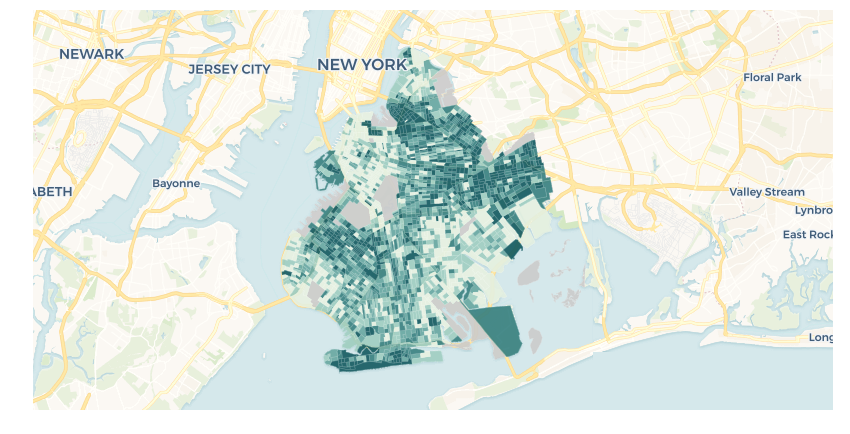

In [5]:
# Interactive map
example_context.map(
    Layer('brooklyn_poverty', color='poverty_per_pop'),
    interactive=False)

## Taxi Data

In [6]:
from cartoframes.examples import read_taxi
df = read_taxi()
df.head()

,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,ratecodeid,store_and_fwd_flag,the_geom,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,vendorid
cartodb_id,,,,,,,,,,,,,,,,,,,,
1,40.706779,-74.012383,0.0,8.5,0.3,0.5,2,1,40.730461,-74.006706,1,False,None,1.00,0.0,10.30,2016-05-01 15:00:36,2016-05-01 14:52:11,2.08,2
2,40.762779,-73.973824,0.0,13.5,0.3,0.5,1,1,40.744125,-73.924957,1,False,None,2.00,0.0,16.30,2016-05-01 08:49:02,2016-05-01 08:34:08,3.00,1
3,40.740833,-73.998955,0.0,14.5,0.3,0.5,1,2,40.748501,-73.973488,1,False,None,0.00,0.0,15.30,2016-05-04 10:07:09,2016-05-04 09:44:40,2.10,1
4,40.792370,-73.966362,0.5,15.0,0.3,0.5,1,2,40.743267,-73.999786,1,False,None,0.00,0.0,16.30,2016-05-01 21:05:24,2016-05-01 20:50:11,4.41,2
5,40.784939,-73.956963,0.0,19.5,0.3,0.5,2,1,40.803360,-73.963631,1,False,None,4.06,0.0,24.36,2016-05-02 07:53:53,2016-05-02 07:26:56,4.01,2


To visualize this data, we need to add a column called `the_geom` to visualize. Using `example_context` we can call the `query` method to get the data or `QueryLayer` to visualize on a map.

If we try to map it, we will get an error because this dataset doesn't have explicit geometries.

In [7]:
example_context.map(Layer('taxi_50k'))

ValueError: No geometry for layer. Check all layer tables and queries to ensure there are geometries.

### Creating a geometry

There are many ways to create geometries from the lng/lat pairs in the taxi dataset. Here we will do a "crow fly" distance (converted from meters to miles) between pickups and drop-offs.

In [8]:
q = '''
SELECT
  *,
  ST_Transform(the_geom, 3857) as the_geom_webmercator,
  ST_Length(the_geom::geography) / 1609 as crow_dist
FROM (
    SELECT
      ST_MakeLine(CDB_LatLng(pickup_latitude, pickup_longitude), CDB_LatLng(dropoff_latitude, dropoff_longitude)) as the_geom,
      cartodb_id,
      fare_amount,
      trip_distance
    FROM taxi_50k
    WHERE pickup_latitude <> 0 and dropoff_latitude <> 0
) as _w
'''
example_context.map(
    QueryLayer(q, color='fare_amount', opacity=0.05),
    zoom=12, lng=-73.9503, lat=40.7504
)

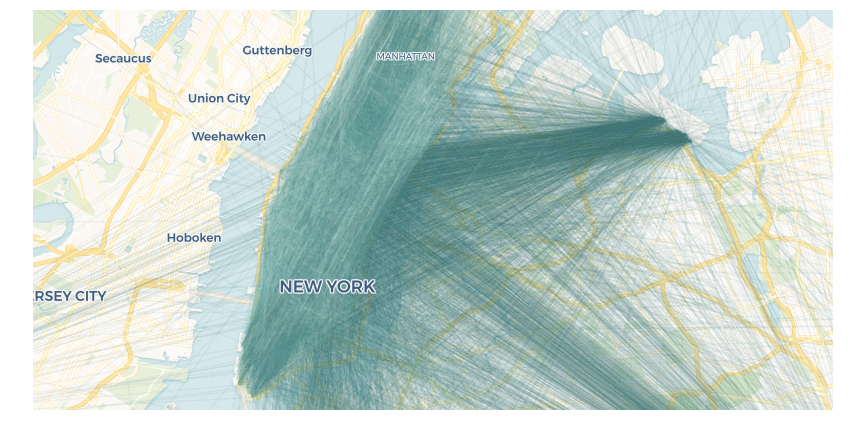

In [9]:
# static view
example_context.map(
    QueryLayer(q, color='fare_amount', opacity=0.05),
    zoom=12, lng=-73.9503, lat=40.7504,
    interactive=False
)

We can use that same query to get the line geometries, and compare the crow fly distance with the reported distance.

In [10]:
taxi_lines = example_context.query(q)
taxi_lines.head()

,crow_dist,fare_amount,the_geom,trip_distance
cartodb_id,,,,
1,1.661395,8.5,0102000020E610000002000000020000E06D8052C00400...,2.08
2,2.869732,13.5,0102000020E610000002000000FEFFFF7F327B52C0FBFF...,3.00
3,1.437734,14.5,0102000020E610000002000000000000A04D7E52C0FFFF...,2.10
4,3.815911,15.0,0102000020E610000002000000FEFFFF7FFC7F52C00400...,4.41
5,1.318624,19.5,0102000020E610000002000000FEFFFF1FAC7D52C00500...,4.01


## Nat dataset

In [11]:
from cartoframes import styling
example_context.map(Layer('nat', color={'column': 'hr90', 'scheme': styling.sunset(7)}))